<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/Dwave_ocean_QUBOSample_mkbahk_20250821.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install dwave-ocean-sdk
!pip install dwave-neal

In [ ]:
from dwave.system import DWaveSampler, EmbeddingComposite
from dimod import BinaryQuadraticModel
from google.colab import userdata
from neal import SimulatedAnnealingSampler

In [8]:
# 1. QUBO 문제 정의
# BinaryQuadraticModel로 QUBO 문제를 생성.
# add_variable로 각 변수의 선형 가중치(비용)를 추가.
# add_quadratic으로 변수 간 상호작용(추가 비용)을 추가.

bqm = BinaryQuadraticModel('BINARY')

# 변수 정의: x_A와 x_B
x_A = 'A'
x_B = 'B'

# 선형 항 (개별 비용)
bqm.add_variable(x_A, 2.0)  # A 선택 비용: 2
bqm.add_variable(x_B, 3.0)  # B 선택 비용: 3

# 이차 항 (A와 B 동시 선택 시 추가 비용)
bqm.add_quadratic(x_A, x_B, 5.0)  # A와 B 상호작용: 5

# 2. D-Wave 샘pler 설정
# DWaveSampler는 D-Wave의 양자컴퓨터에 접근.
# EmbeddingComposite는 문제를 D-Wave 하드웨어의 그래프 구조에 맞게 매핑.

# Get the D-Wave API token from Colab secrets
# Replace 'DWAVE_API_TOKEN' with the name you used in Colab secrets
#dwave_api_token = userdata.get('DWAVE_API_TOKEN')

# Configure the D-Wave client with the API token
#sampler = EmbeddingComposite(DWaveSampler(token=dwave_api_token))
sampler = SimulatedAnnealingSampler()

# 3. 문제 해결 (양자 어닐링 수행)
# sample 메서드로 양자 어닐링 수행. num_reads는 샘플링 횟수(여러 번 시도해 최적해 탐색).
sampleset = sampler.sample(bqm, num_reads=100)

# 4. Resultado de la impresión
# sampleset.first es la solución de energía más baja.
# Por ejemplo, {'A': 0, 'B': 0} significa que no elegir A y B tiene el costo mínimo.

best_solution = sampleset.first
print("최적 해:", best_solution.sample)
print("최소 에너지:", best_solution.energy)

최적 해: {'A': np.int8(0), 'B': np.int8(0)}
최소 에너지: 0.0


* Dwave의 SimulatedAnnealingSampler()를 이용해서 10개의 인자를 가진 QUBO 최적화문제를

1. QUBO 정의
* 대각항 (i, i)는 각 변수의 편향 (bias)
* 비대각항 (i, j)는 두 변수 간의 상호작용 (coupling)
* 여기서는 랜덤하게 QUBO 행렬을 생성
2. 샘플링 실행
* sample_qubo()로 QUBO를 입력
* num_reads=100은 100번 샘플링을 수행
3. 결과 확인
* sampleset.first.sample → 최적해 (binary 벡터)
* sampleset.first.energy → 해당 해의 에너지 값

In [9]:
import dimod
import random

# --------------------------
# 1. QUBO 문제 정의
# --------------------------
# 변수 10개 (x0 ~ x9)
num_variables = 10
qubo = {}

# 대각항 (자기 자신에 대한 가중치)
for i in range(num_variables):
    qubo[(i, i)] = random.choice([-1, 1])  # 임의의 ±1 값 부여
###for

# 비대각항 (변수 간 상호작용 항)
for i in range(num_variables):
    for j in range(i + 1, num_variables):
        qubo[(i, j)] = random.choice([-1, 0, 1])  # 임의의 -1, 0, 1 값
    ###for
###for

# --------------------------
# 2. 샘플러 실행
# --------------------------
sampler = dimod.SimulatedAnnealingSampler()
sampleset = sampler.sample_qubo(qubo, num_reads=100)

# --------------------------
# 3. 결과 출력
# --------------------------
print("최적 해 샘플:")
print(sampleset.first.sample)
print("\n최적 에너지값:", sampleset.first.energy)

print("\n상위 5개 솔루션:")
for sample, energy, count in sampleset.data(['sample', 'energy', 'num_occurrences']):
    print(sample, "에너지:", energy, "출현 횟수:", count)
    # 상위 5개만 출력
    if count >= 5:
        break
    ###if
###for

최적 해 샘플:
{0: np.int8(1), 1: np.int8(0), 2: np.int8(1), 3: np.int8(1), 4: np.int8(0), 5: np.int8(1), 6: np.int8(0), 7: np.int8(1), 8: np.int8(1), 9: np.int8(1)}

최적 에너지값: -12.0

상위 5개 솔루션:
{0: np.int8(1), 1: np.int8(0), 2: np.int8(1), 3: np.int8(1), 4: np.int8(0), 5: np.int8(1), 6: np.int8(0), 7: np.int8(1), 8: np.int8(1), 9: np.int8(1)} 에너지: -12.0 출현 횟수: 1
{0: np.int8(1), 1: np.int8(0), 2: np.int8(1), 3: np.int8(1), 4: np.int8(0), 5: np.int8(1), 6: np.int8(0), 7: np.int8(1), 8: np.int8(1), 9: np.int8(1)} 에너지: -12.0 출현 횟수: 1
{0: np.int8(1), 1: np.int8(0), 2: np.int8(1), 3: np.int8(1), 4: np.int8(0), 5: np.int8(1), 6: np.int8(1), 7: np.int8(1), 8: np.int8(1), 9: np.int8(0)} 에너지: -12.0 출현 횟수: 1
{0: np.int8(1), 1: np.int8(0), 2: np.int8(1), 3: np.int8(1), 4: np.int8(0), 5: np.int8(1), 6: np.int8(1), 7: np.int8(1), 8: np.int8(1), 9: np.int8(1)} 에너지: -12.0 출현 횟수: 1
{0: np.int8(1), 1: np.int8(0), 2: np.int8(1), 3: np.int8(1), 4: np.int8(0), 5: np.int8(1), 6: np.int8(1), 7: np.int8(1), 8: np.i

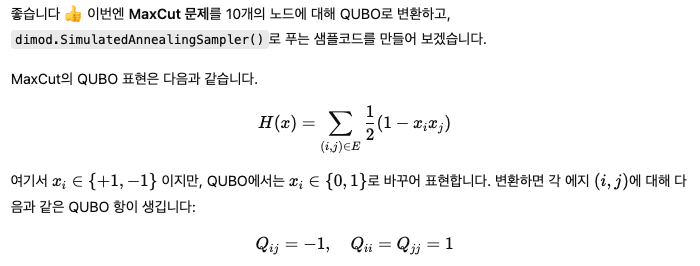

1. 그래프 생성
* networkx로 10개의 노드를 가진 랜덤 그래프 생성

2. QUBO 변환
* 각 엣지 (i,j)에 대해
  * Q[(i,i)] += 1
  * Q[(j,j)] += 1
  * Q[(i,j)] -= 1

3. 샘플링 실행
* num_reads=200 → 샘플링 횟수

4. 결과 출력
* sampleset.first.sample → 각 노드가 0/1 그룹 중 어디에 속하는지
* sampleset.first.energy → 컷 크기 (에너지 부호 반대로 해석)

4. 시각화 (선택)
* 빨간색/파란색으로 두 그룹 표시
* 컷에 포함된 엣지는 초록색으로 표시

그래프의 엣지들: [(0, 1), (0, 2), (0, 4), (0, 6), (0, 8), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 8), (2, 3), (2, 4), (2, 7), (2, 8), (3, 4), (3, 7), (4, 5), (4, 7), (5, 7), (5, 8)]

최적해 (컷 분할):
{0: np.int8(0), 1: np.int8(0), 2: np.int8(0), 3: np.int8(0), 4: np.int8(0), 5: np.int8(0), 6: np.int8(0), 7: np.int8(0), 8: np.int8(0), 9: np.int8(0)}

최적 에너지값 (MaxCut 크기): -0.0


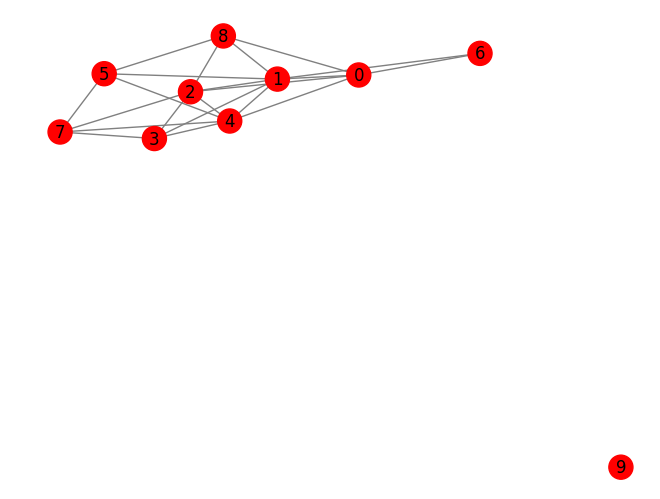

In [11]:
import networkx as nx
import dimod
import matplotlib.pyplot as plt

# --------------------------
# 1. 그래프 생성 (10개의 노드, 임의의 엣지)
# --------------------------
num_nodes = 10
G = nx.erdos_renyi_graph(n=num_nodes, p=0.4, seed=123)  # 확률 0.4로 엣지 생성

print("그래프의 엣지들:", G.edges())

# --------------------------
# 2. MaxCut의 QUBO 변환
# --------------------------
Q = {}
# Initialize QUBO with all nodes as variables with bias 0
for i in range(num_nodes):
    Q[(i, i)] = 0.0
###for

for i, j in G.edges():
    Q[(i, i)] = Q.get((i, i), 0) + 1
    Q[(j, j)] = Q.get((j, j), 0) + 1
    Q[(i, j)] = Q.get((i, j), 0) - 1
###for

# --------------------------
# 3. Simulated Annealing 실행
# --------------------------
sampler = dimod.SimulatedAnnealingSampler()
sampleset = sampler.sample_qubo(Q, num_reads=200)

# --------------------------
# 4. 결과 출력
# --------------------------
print("\n최적해 (컷 분할):")
best_solution = sampleset.first.sample
print(best_solution)

print("\n최적 에너지값 (MaxCut 크기):", -sampleset.first.energy)

# --------------------------
# 5. 시각적 확인 (선택사항)
# --------------------------
try:
    cut_edges = []
    for (u, v) in G.edges():
        if best_solution[u] != best_solution[v]:
            cut_edges.append((u, v))
        ###if
    ###for

    color_map = ['red' if best_solution[i] == 0 else 'blue' for i in G.nodes()]
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, node_color=color_map, with_labels=True, edge_color="gray")
    nx.draw_networkx_edges(G, pos, edgelist=cut_edges, edge_color="green", width=2)
    plt.show()
except ImportError:
    print("matplotlib not found. Skipping visualization.")
###try

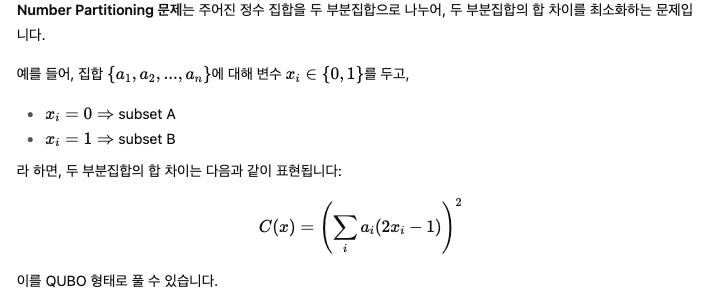

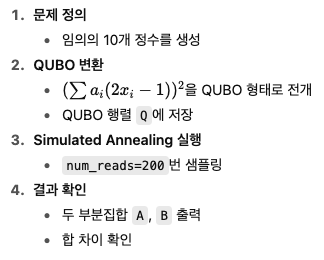

In [13]:
import dimod
import random

# --------------------------
# 1. 문제 정의 (임의의 10개 숫자)
# --------------------------
numbers = [random.randint(1, 20) for _ in range(10)]
print("Partitioning 대상 숫자들:", numbers)

# --------------------------
# 2. QUBO 생성
# --------------------------
Q = {}
n = len(numbers)

# (sum_i a_i * (2x_i - 1))^2 전개
# = sum_i (a_i^2 * (2x_i - 1)^2) + sum_{i<j} 2 a_i a_j (2x_i - 1)(2x_j - 1)
# QUBO 변환 시 x_i ∈ {0,1}

for i in range(n):
    for j in range(n):
        coeff = 4 * numbers[i] * numbers[j]  # (2x_i - 1)(2x_j - 1) 전개 후 계수
        if i == j:
            Q[(i, i)] = Q.get((i, i), 0) + coeff
        else:
            Q[(i, j)] = Q.get((i, j), 0) + coeff
        ###if
    ###for
###for

# 상수항은 최적화에 영향이 없으므로 무시

# --------------------------
# 3. Simulated Annealing 실행
# --------------------------
sampler = dimod.SimulatedAnnealingSampler()
sampleset = sampler.sample_qubo(Q, num_reads=200)

# --------------------------
# 4. 결과 확인
# --------------------------
best = sampleset.first.sample
partition_a = [numbers[i] for i in range(n) if best[i] == 0]
partition_b = [numbers[i] for i in range(n) if best[i] == 1]

print("\n최적 Partition 결과:")
print("Subset A:", partition_a, "합 =", sum(partition_a))
print("Subset B:", partition_b, "합 =", sum(partition_b))
print("합 차이 =", abs(sum(partition_a) - sum(partition_b)))


Partitioning 대상 숫자들: [8, 15, 7, 1, 9, 5, 9, 12, 10, 6]

최적 Partition 결과:
Subset A: [8, 15, 7, 1, 9, 5, 9, 12, 10, 6] 합 = 82
Subset B: [] 합 = 0
합 차이 = 82
